In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import load_dat_file

folderpath = r"gas+sensor+array+drift+dataset\Dataset"

dfs = []
for i in range(1, 11):
    path = fr"{folderpath}\batch{i}.dat"
    df_temp = load_dat_file(path)
    df_temp["batch"] = f"batch{i}" # Neuer Batch-Label
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f121,f122,f123,f124,f125,f126,f127,f128,label,batch
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,1,batch1
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,1,batch1
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,1,batch1
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,1,batch1
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756,1,batch1


In [2]:
print(df.shape)
print(df["batch"].value_counts()) # Neu: Anzahl der Gassensorwerte für jeden Batch
print(df.info())
print(df.describe())

(13910, 130)
batch
batch7     3613
batch10    3600
batch6     2300
batch3     1586
batch2     1244
batch9      470
batch1      445
batch8      294
batch5      197
batch4      161
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 130 entries, f1 to batch
dtypes: float64(128), int64(1), object(1)
memory usage: 13.8+ MB
None
                  f1            f2            f3            f4            f5  \
count   13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean    50435.066174      6.638156     12.936688     18.743953     26.890695   
std     69844.785952     13.486391     17.610061     24.899450     38.107685   
min    -16757.598600      0.088287      0.000100      0.000100      0.000100   
25%      6694.725950      2.284843      1.633350      2.386836      4.967988   
50%     19364.439350      3.871227      4.977123      7.250892     11.680725   
75%     63104.837125      8.400619     17.189166     26

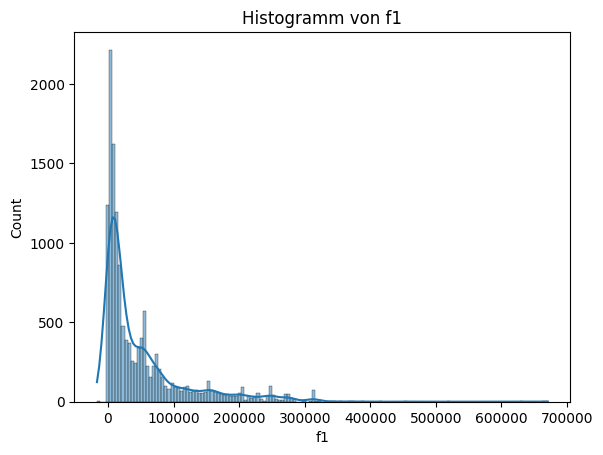

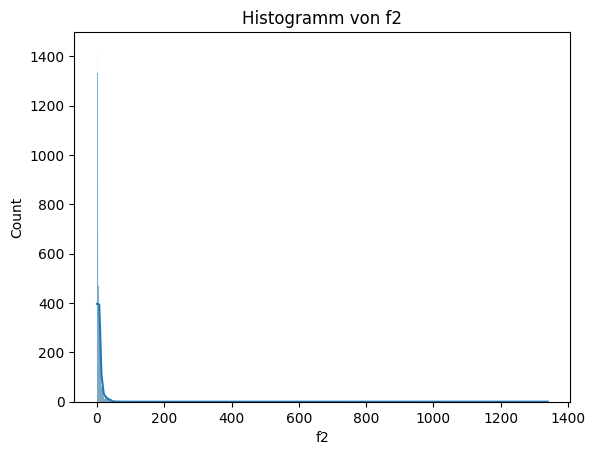

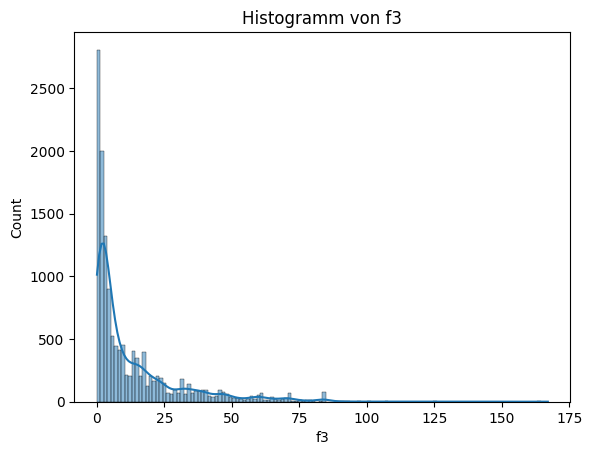

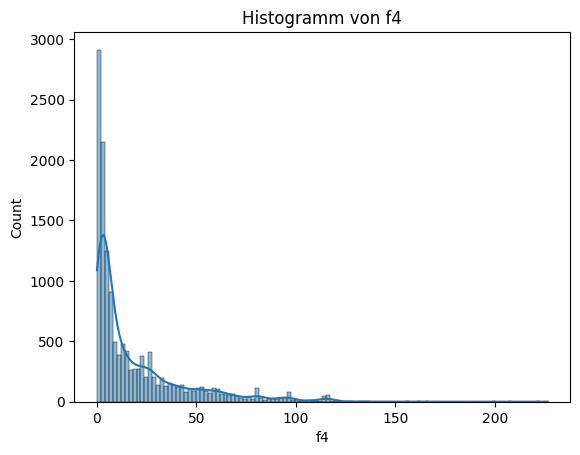

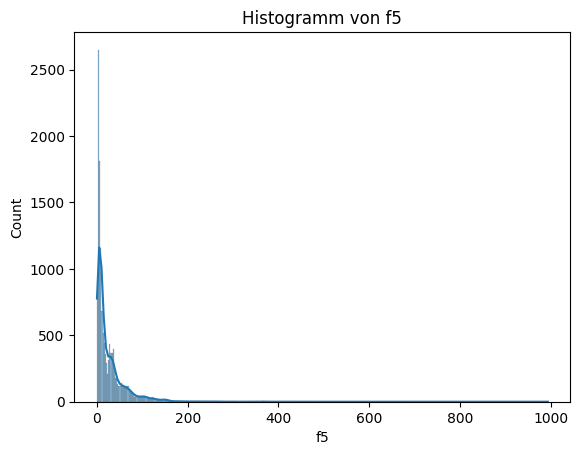

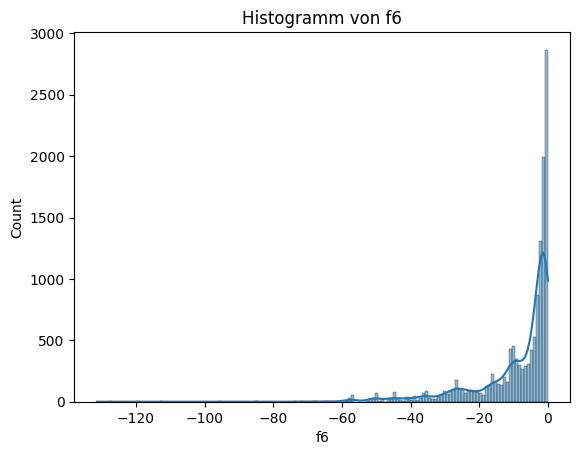

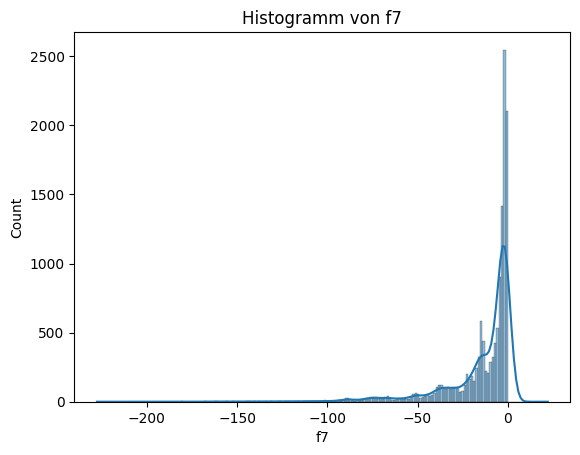

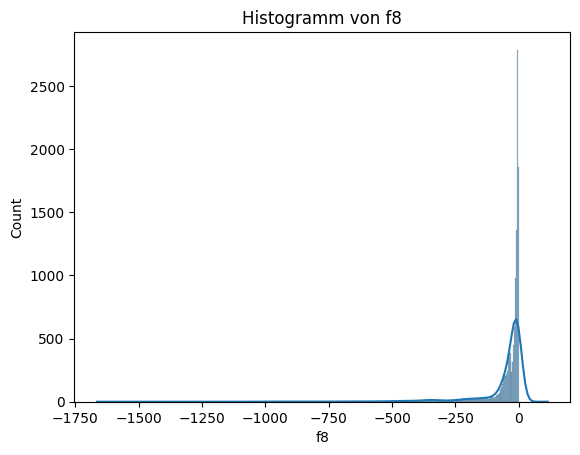

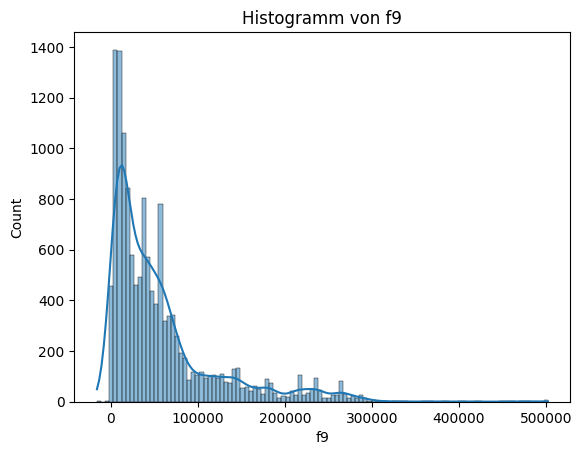

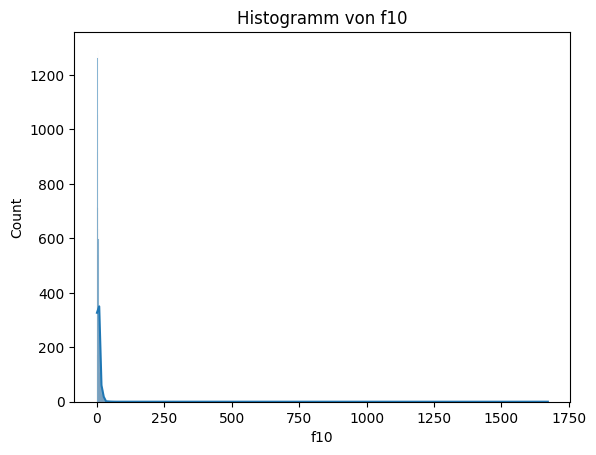

In [3]:
# Histogramme für 10 Features erstmal
features = df.drop(columns=['label', 'batch'])

for feature in features.columns[:10]:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Histogramm von {feature}")
    plt.show()

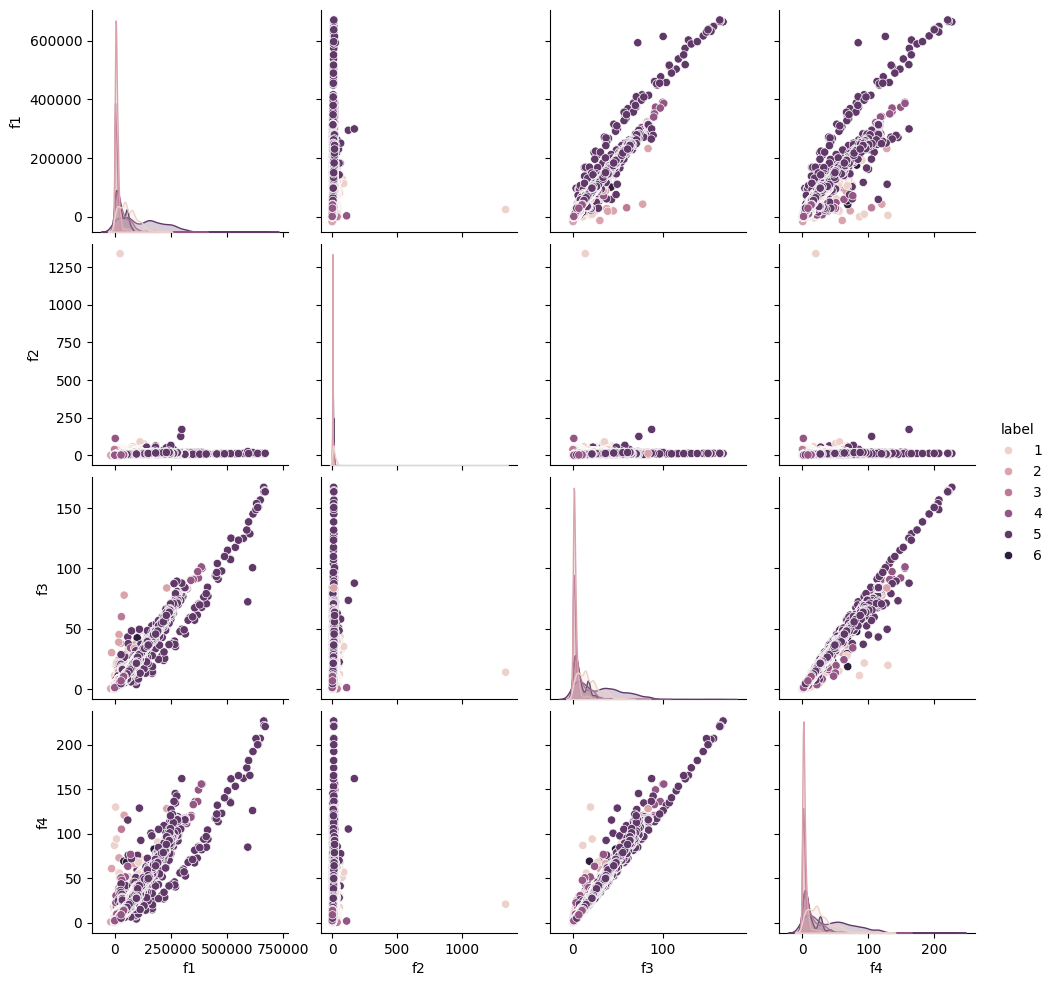

In [4]:
# Pairplot für ein paar Features + label als Hue
sample_features = ['f1', 'f2', 'f3', 'f4', 'label']
sns.pairplot(df[sample_features], hue='label')
plt.show()

In [5]:
# Datenreinigung (Fehlende Werte sind nativ nicht enthalten, aber dennoch)
pd.set_option('display.max_rows', None) # Alle Features anzeigen, statt Mitte abzuschneiden
print(df.isnull().sum())

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
f29      0
f30      0
f31      0
f32      0
f33      0
f34      0
f35      0
f36      0
f37      0
f38      0
f39      0
f40      0
f41      0
f42      0
f43      0
f44      0
f45      0
f46      0
f47      0
f48      0
f49      0
f50      0
f51      0
f52      0
f53      0
f54      0
f55      0
f56      0
f57      0
f58      0
f59      0
f60      0
f61      0
f62      0
f63      0
f64      0
f65      0
f66      0
f67      0
f68      0
f69      0
f70      0
f71      0
f72      0
f73      0
f74      0
f75      0
f76      0
f77      0
f78      0
f79      0
f80      0
f81      0
f82      0
f83      0
f84      0
f85      0
f86      0
f87      0
f88      0
f89      0
f90      0
f91      0

In [7]:
# Ausreißererkennung; IQR

num_df = df.select_dtypes(include="number") # numerische Features nur

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()
print(outliers.sort_values(ascending=False)) 

f16      1862
f8       1767
f1       1418
f72      1380
f80      1355
f7       1295
f6       1283
f42      1260
f9       1225
f76      1156
f15      1139
f3       1134
f34      1127
f75      1126
f77      1117
f74      1068
f73      1067
f5       1004
f14      1000
f66       984
f4        976
f79       936
f13       924
f11       909
f2        895
f78       892
f47       871
f26       866
f98       863
f18       859
f65       849
f12       822
f46       807
f112      795
f106      790
f69       789
f104      786
f58       772
f122      759
f114      759
f68       746
f50       743
f71       734
f39       710
f90       703
f67       700
f10       694
f82       691
f38       652
f85       638
f70       623
f93       599
f43       598
f41       595
f33       588
f84       566
f56       561
f24       549
f35       549
f29       547
f120      546
f117      545
f19       543
f27       538
f28       536
f128      533
f21       530
f20       530
f116      525
f92       525
f61       510
f111  

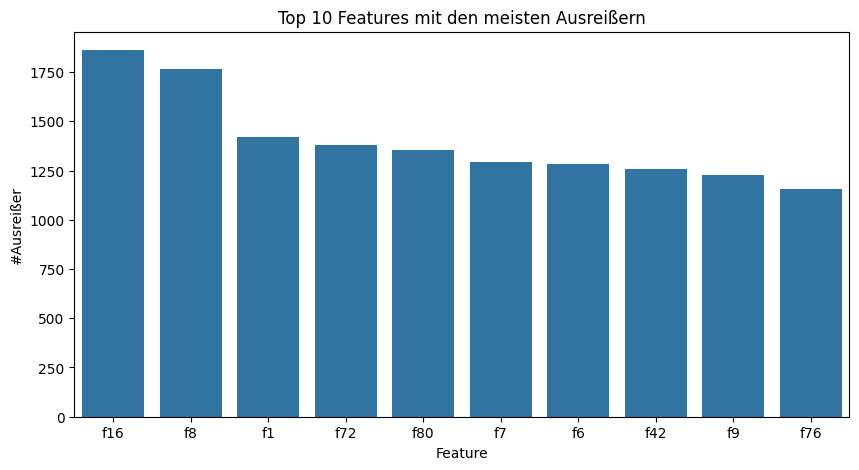

In [8]:
# Visuelle Grafik mit N größten Ausreißern
# Sortiere nach meisten Ausreißern
n = 10
top_outliers = outliers.sort_values(ascending=False).head(n)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_outliers.index, y=top_outliers.values)
plt.title(f"Top {n} Features mit den meisten Ausreißern")
plt.xlabel("Feature")
plt.ylabel("#Ausreißer")
plt.show()

In [5]:
# Nur als visuelle Inspektion der Anzahl der vorkommenden Gasarten
class_counts = df.iloc[:, 128].value_counts().sort_index
print(class_counts)

<bound method Series.sort_index of label
2    98
1    90
3    83
6    74
5    70
4    30
Name: count, dtype: int64>
